# Visualize Events

In [1]:
#For inline plots:
%matplotlib inline
#to be able to interact with the plots:
#%matplotlib nbagg

In [2]:
import matplotlib
import numpy as np
import pandas as pd
import pytpc
import matplotlib.pyplot as plt
import h5py

## Walk through of the script eventNumpyArrayh5_toPNG.py

In [44]:
with h5py.File('new_hit_method_thresh50_images.h5','r') as f:
    images = f['images'][:]

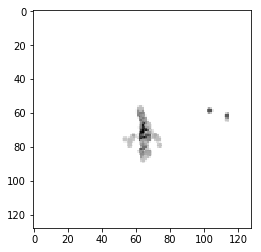

In [45]:
for i, image in enumerate(images):
    plt.imshow(image)
    plt.savefig('/home/selby/attpc-alpha-alpha/newMethodThresh50/event'+str(i+1)+'thresh50.png', format='PNG')

## Investigating inverting grey scale

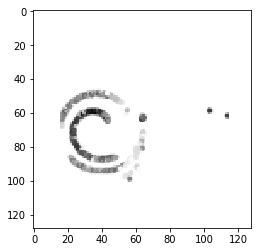

<Figure size 640x640 with 0 Axes>

In [41]:
plt.imshow(images[0])
#plt.set_cmap('Greys_r')
#plt.set_cmap('Greys')
fig = plt.figure(figsize=(5, 5), dpi=128)
plt.show()

## clustering (feature clustering) as shown in weekly presentation Week15

In [10]:
upperleft = [26,2,58,36,34,5,33,29,50,20,12,46,65,55,57,4,8,62,60,68,37,40,28,72,13,11,59,54,22,23,30,19,27,3,6,17,69,21]
# note: [36,34] [33,34] [50,20] [46,65] [55,57] [27,3] [69,21]
upleftspecialgroups = [[36,34],[33,34],[50,20],[46,65],[55,57],[27,3],[69,21]]

lowerright = [45,43,71,52,0,32,15,7,70,9,41,25,10,73,1,47,61,42,51,49,53,48,64,14,63,39,18,31,24,38,35,16,44,66,56,67]
# note: [7,70] [53,48] [64,14] [39,18] [38,35] [16,44] [66,56,67]
lowrightspecialgroups = [[7,70],[53,48],[64,14],[39,18],[38,35],[16,44],[66,56,67]]

In [19]:
print(len(upperleft))
print(len(lowerright))

38
36


## plotting using old methods of hit detection

# NOT RELEVENT to current state of analysis

In [21]:
with h5py.File('eventImagesThresh55images.h5','r') as f:
    images = f['images'][:]

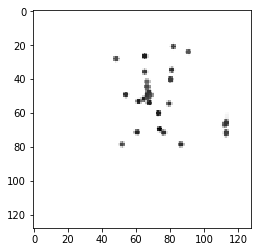

In [23]:
plt.imshow(images[34])

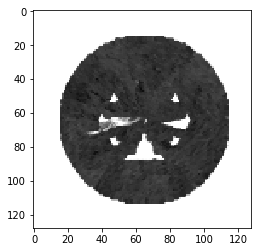

In [16]:
#imagesthresh50path = '/home/selby/attpc-alpha-alpha/eventImagesThresh50'
#for i, image in enumerate(images):
for i in range(len(lowerright)):
    #plt.imshow(image)
    plt.imshow(images[upperleft[i])
    #plt.savefig('/home/selby/attpc-alpha-alpha/eventImagesThresh50lowerrightfeatures/event'+str(lowerright[i])+'thresh50.png', format='PNG')

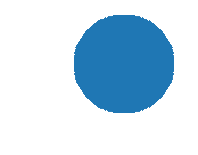

In [5]:
events = pytpc.HDFDataFile('corrected_run_0210.h5', 'r')
event = events[1]
xyzs = event.xyzs(peaks_only=False, drift_vel=5.2, clock=12.5, return_pads=False, 
                  baseline_correction=False,cg_times=False)
x = xyzs[:, 0].flatten()
z = xyzs[:, 1].flatten()

fig = plt.figure(figsize=(1, 1), dpi=128)
plt.xlim(-275.0, 275.0)
plt.ylim((-275.0, 275.0))
plt.axis('off')
plt.scatter(x, z, s=0.6)
plt.show()

import sys
sys.path.append('..')
import pytpc
from pytpc.constants import pi, degrees
import matplotlib.pyplot as plt
import matplotlib as mpl
from math import sin, cos
import numpy as np
import scipy.stats as ss
import seaborn as sns
import pandas as pd
from matplotlib.colors import LogNorm
from matplotlib import gridspec

# First attempt
## TPC parameters:

### example:
tilt = 7*degrees
clock = 6.25  # MHz
emag = 15e3
bmag = 0.5691
ef = np.array([0, 0, emag])
bfield_orig = np.array([0, 0, bmag])
trans = np.array([[1, 0, 0],
                  [0, cos(-tilt), -sin(-tilt)],
                  [0, sin(-tilt), cos(-tilt)]])
bf = np.dot(trans, bfield_orig)
vd = pytpc.simulation.drift_velocity_vector(-3.32, emag, bmag, tilt)

## Loading Files

In [ ]:
#pads = pytpc.generate_pad_plane(rotation_angle=-108.*pytpc.pi/180.)
ef = pytpc.EventFile("/home/selby/attpc-alpha-alpha/run_0210.h5") #should be .evt
    
#use if using event files without background subtraction 
ef = evtdata.EventFile("")
peds = evtdata.load_pedestals("") #Peds20141208-2.csv (look up load_pedestals)
pm = evtdata.load_padmap("")      #lookup table [Lookup20141208.csv]

## Reading an Event

In [ ]:
#read event based on given parameter
evt = ef[1]

In [ ]:
#if pedestals have not been subtracted already in the fill:
evt.traces['data'] -= [ numpy.ones(512,) * peds[tuple(addr)] for addr in evt.traces[['cobo','asad','aget','channel']] ]
evt.traces['data'] = ss.threshold(evt.traces['data'], threshmin=35)
evt.traces['pad'] = [ pm[tuple(addr)] for addr in evt.traces[['cobo','asad','aget','channel']] ]

# Plots

## Pad Plane (2D)

In [2]:
p = pytpc.pad_plot(evt.hits(), None) #second arg: pads (for given rotation in Loading Files section)

#to save image
#p.savefig('/Users/Gray/Documents/Physics/NuclearCompSciResearch/attpc-alpha-alpha/padplane.pdf', transparent=True)

For pytpc.pad_plot:

Parameters:
data: (array) should be a 1D array with an entry for each pad
pads: (array) the default(pads=None) (generated using 'generate_pad_plane' should suffice (no rotation)